# Mini Project-Fraud Detection

## Import libraries

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
sns.set()

## Import data (Clients + Consumption )

In [ ]:
client = pd.read_csv('CLIENT_CONSOMMATION_UR60.csv')
data = pd.DataFrame(data= [x[0].split() for x in client.values ] , columns =client.iloc[0].index[0].split()+['unnamed'])
data = data.drop('unnamed',1)
data.head()

,CF_AB_CODE,CF_AB_REF,CF_FACT_DATFACT,RC_BTTARIF_CODE,BT_CONSO_NUMCPTR,RC_BT_SCPTR_CODE,RC_CCPTEUR_CODE,RC_BT_ERLV_CODE,BT_CONSO_COEFF,BT_CONSO_CONSO1,BT_CONSO_CONSO2,BT_CONSO_CONSO3,BT_CONSO_CONSO4,BT_CONSO_AINDEX,BT_CONSO_NINDEX,BT_CONSO_NBRMOIS
0,BT,000110050,03/10/2017,11,124416,0,433,9,1,200,100,200,3409,762111,766020,1
1,BT,000110050,05/12/2017,11,124416,0,433,9,1,200,100,200,4327,771442,776269,1
2,BT,000110050,02/02/2018,11,124416,0,433,9,1,200,100,200,3756,779828,784084,1
3,BT,000110050,02/03/2018,11,124416,0,433,9,1,200,100,200,4130,784084,788714,1
4,BT,000110050,03/04/2018,11,124416,0,433,9,1,200,100,200,3732,788714,792946,1


In [ ]:
clients = pd.read_csv('CLIENT.csv')

In [ ]:
data2 = pd.DataFrame(data= [x[0].split() for x in clients.values ] , columns =clients.iloc[0].index[0].split())

## Jointure de clients et consommations

In [ ]:
new_train = pd.merge(data,data2, on="CF_AB_REF",how="inner")

The goal of merging the data here is to determine what are we going to do with the missing values that we have. Add to that, we will use it in the future in order to evaluate the model that we have created.

### Client data set cleaning

In [ ]:
data2.head()

,RC_UR_CODE,CF_AB_CODE,CF_AB_REF,RC_CATEG_CODE,RC_COMMUNE_CODE,CF_AB_DAT_CREATION,CF_AB_SOLDE_FINAL,CF_AB_MENSUALISE,CF_AB_RELANCE,FRAUDE
0,60,BT,000010010,11,0101,15/01/2009,299704,0,1,0
1,60,BT,000010020,11,0101,29/04/2014,0,0,0,0
2,60,BT,000110020,11,0101,23/12/2013,636432,0,1,0
3,60,BT,000110050,51,0101,08/10/2004,523661,0,0,0
4,60,BT,000110070,51,0101,08/10/2008,218691,0,0,0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686576 entries, 0 to 686575
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   RC_UR_CODE          686576 non-null  object
 1   CF_AB_CODE          686576 non-null  object
 2   CF_AB_REF           686576 non-null  object
 3   RC_CATEG_CODE       686576 non-null  object
 4   RC_COMMUNE_CODE     686576 non-null  object
 5   CF_AB_DAT_CREATION  686576 non-null  object
 6   CF_AB_SOLDE_FINAL   686576 non-null  object
 7   CF_AB_MENSUALISE    686576 non-null  object
 8   CF_AB_RELANCE       686576 non-null  object
 9   FRAUDE              520979 non-null  object
dtypes: object(10)
memory usage: 52.4+ MB


Let's drop the unnecessary columns

In [ ]:
data2.drop('CF_AB_CODE',axis=1,inplace=True)
data2.drop('CF_AB_SOLDE_FINAL',axis=1,inplace=True)
data2.drop('CF_AB_MENSUALISE',axis=1,inplace=True)
data2.drop('CF_AB_RELANCE',axis=1,inplace=True)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686576 entries, 0 to 686575
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   RC_UR_CODE          686576 non-null  object
 1   CF_AB_REF           686576 non-null  object
 2   RC_CATEG_CODE       686576 non-null  object
 3   RC_COMMUNE_CODE     686576 non-null  object
 4   CF_AB_DAT_CREATION  686576 non-null  object
 5   FRAUDE              520979 non-null  object
dtypes: object(6)
memory usage: 31.4+ MB


We will set the "CF_AB_REF" in the index.

In [ ]:
data2["CF_AB_REF"]= data2["CF_AB_REF"].astype(int)

In [ ]:
data2.set_index("CF_AB_REF",inplace=True)

In [ ]:
data2["RC_COMMUNE_CODE"].unique()

array(['0101', '0199', '0301', '0302', '0303', '0305', '0310', '0304',
       '0307', '0306', '0309', '0308', '0371', '0399', '0312', '0311',
       '0372', '0313', '0379', '0103', '0107', '0104', '0206', '0106',
       '0105'], dtype=object)

It corresponds to the 'Commune' shown in the description.

Let's explore the column "Date Creation".

In [ ]:
len(data2["CF_AB_DAT_CREATION"].unique())

86444

As we see here this column has a lot of non representative values(ie: we have only 365 day in the year and we are working on only 15 years (5475)), we will not focus on cleaning this column.

## Data Conversion to the appropriate types

In [ ]:
data2["RC_UR_CODE"]=data2["RC_UR_CODE"].astype(int)
data2["RC_CATEG_CODE"]=data2["RC_CATEG_CODE"].astype(int)
data2["RC_COMMUNE_CODE"]=data2["RC_COMMUNE_CODE"].astype(int)

In [ ]:
data2["FRAUDE"].isnull().sum().sum()

165597

We have 165597 missing values, which is significant because we have 686576 client in our data.We tried filling them with 0s and dropping them.When we droped them, our model behaved better.

In [ ]:
data2.dropna(inplace=True)

In [ ]:
data2["FRAUDE"].unique()

array(['0', '1', '2', '3'], dtype=object)

In [ ]:
data2["FRAUDE"]=data2["FRAUDE"].astype(int)

In [ ]:
data2["FRAUDE"].value_counts()

0    510125
1     10762
2        67
3        25
Name: FRAUDE, dtype: int64

We have 3 types of fraud. for the electricity, gaz , or both of them. 
<br> We will convert all of them to 1s in order to indicate that the client is fraudulant.


In [ ]:
data2.loc[ data2['FRAUDE'] == 2, 'FRAUDE'] = 1
data2.loc[ data2['FRAUDE'] == 3, 'FRAUDE'] = 1

In [ ]:
data2.FRAUDE.unique()

array([0, 1])

In [ ]:
data2.head()

,RC_UR_CODE,RC_CATEG_CODE,RC_COMMUNE_CODE,CF_AB_DAT_CREATION,FRAUDE
CF_AB_REF,,,,,
10010,60,11,101,15/01/2009,0
10020,60,11,101,29/04/2014,0
110020,60,11,101,23/12/2013,0
110050,60,51,101,08/10/2004,0
110070,60,51,101,08/10/2008,0


### Consumption's dataframe cleaning

Droping the unnecessary columns

In [ ]:
data.drop("CF_AB_CODE",axis=1,inplace=True)

In [ ]:
data.drop("RC_CCPTEUR_CODE",axis=1,inplace=True)

In [ ]:
data.drop("RC_BT_ERLV_CODE",axis=1,inplace=True)

#### We will convert now our data

In our model, we will classify the fraud detection based on the counters and not on the clients. For that reason we are going to work on the consumption  data set and we will further more generalize it using the client's dataset.

We will start by converting the object types to the appropriate ones.

In [ ]:
data["CF_AB_REF"]= data["CF_AB_REF"].astype(int)

In [ ]:
data["CF_FACT_DATFACT"] =  pd.to_datetime(data["CF_FACT_DATFACT"])

In [ ]:
data["RC_BTTARIF_CODE"] = data["RC_BTTARIF_CODE"].astype(int)

In [ ]:
data["RC_BT_SCPTR_CODE"] = data["RC_BT_SCPTR_CODE"].astype(int)

In [ ]:
data["BT_CONSO_COEFF"] = data["BT_CONSO_COEFF"].astype(int)

In [ ]:
data["RC_BT_SCPTR_CODE"]=data['RC_BT_SCPTR_CODE'].astype(int)  

In [ ]:
data["BT_CONSO_CONSO2"].isnull().sum().sum()

1890

In [ ]:
new_train["FRAUDE"][new_train["BT_CONSO_CONSO2"].isnull()==True].value_counts()


0    1697
Name: FRAUDE, dtype: int64

In [ ]:
print("The proportion for this part of data is:",1890/1048575)

The proportion for this part of data is: 0.0018024461769544382


As we see, we have 1890 missing values. Those 1890 missing values correspand to exactly 1890 row in our data. As consulted (when we compared the result according to the merged data), we saw that all of them are not frauders. As the proportion of non frauders is much more higher than of those who are frauders. We decided that we are going to drop those rows.

In [ ]:
data.dropna(inplace=True)

In [ ]:
data["BT_CONSO_CONSO1"] = data["BT_CONSO_CONSO1"].astype(int)
data["BT_CONSO_CONSO2"] = data["BT_CONSO_CONSO2"].astype(int)
data["BT_CONSO_CONSO3"] = data["BT_CONSO_CONSO3"].astype(int)
data["BT_CONSO_CONSO4"] = data["BT_CONSO_CONSO4"].astype(int)

#### Creation of the "Consomation" column.

In [ ]:
data["BT_CONSO_NINDEX"]=data["BT_CONSO_NINDEX"].astype(int)
data["BT_CONSO_AINDEX"]=data["BT_CONSO_AINDEX"].astype(int)

data["Consomation"]=data["BT_CONSO_NINDEX"]-data["BT_CONSO_AINDEX"]

data.drop("BT_CONSO_AINDEX",axis=1,inplace=True)
data.drop("BT_CONSO_NINDEX",axis=1,inplace=True)

In [ ]:
data["BT_CONSO_NBRMOIS"]=data["BT_CONSO_NBRMOIS"].astype(int)

In [ ]:
data.dtypes

CF_AB_REF                    int32
CF_FACT_DATFACT     datetime64[ns]
RC_BTTARIF_CODE              int32
BT_CONSO_NUMCPTR            object
RC_BT_SCPTR_CODE             int32
BT_CONSO_COEFF               int32
BT_CONSO_CONSO1              int32
BT_CONSO_CONSO2              int32
BT_CONSO_CONSO3              int32
BT_CONSO_CONSO4              int32
BT_CONSO_NBRMOIS             int32
Consomation                  int32
dtype: object

All type are now as described

#### Verifing the data range.

In [ ]:
data.set_index("CF_AB_REF",inplace=True)

In [ ]:
data["BT_CONSO_NBRMOIS"][data["BT_CONSO_NBRMOIS"] >94].value_counts()

28229    2
28223    1
28263    1
28259    1
24100    1
28273    1
28231    1
26184    1
24612    1
27564    1
26677    1
28274    1
25203    1
24949    1
27895    1
28248    1
27161    1
25698    1
Name: BT_CONSO_NBRMOIS, dtype: int64

In [ ]:
print(np.where(data["BT_CONSO_NBRMOIS"] >94))


(array([659072, 659074, 659076, 659079, 659082, 659085, 659088, 659091,
       659092, 659095, 659098, 659101, 659420, 659423, 659426, 659428,
       659431, 659434, 659436], dtype=int64),)


In [ ]:
data["BT_CONSO_NBRMOIS"]=data["BT_CONSO_NBRMOIS"].apply(lambda x:min(x,94))

According to the description of our data , at most we will have 94 months between the new and the old  measure of the  indexs index , as we saw we have greater result, this is may be due to some unknown error , for that reason , we sat up all this values to the value of 94.

In [ ]:
data["BT_CONSO_NBRMOIS"].max()

94

As we see , we have solved this problem.

In [ ]:
data.dtypes

CF_FACT_DATFACT     datetime64[ns]
RC_BTTARIF_CODE              int32
BT_CONSO_NUMCPTR            object
RC_BT_SCPTR_CODE             int32
BT_CONSO_COEFF               int32
BT_CONSO_CONSO1              int32
BT_CONSO_CONSO2              int32
BT_CONSO_CONSO3              int32
BT_CONSO_CONSO4              int32
BT_CONSO_NBRMOIS             int64
Consomation                  int32
dtype: object

In [ ]:
data["RC_BT_SCPTR_CODE"].unique()

array([     0,      1,      5,      4,      3,      2, 282181])

In [ ]:
data["RC_BT_SCPTR_CODE"].value_counts(ascending=True)


282181         19
2              42
3             101
4            1085
5            6893
1           12424
0         1026121
Name: RC_BT_SCPTR_CODE, dtype: int64

We have 19 values that violate the range of our data as described.So we are going to drop those values so that we can't make wrong assumptions.

In [ ]:
new_train["FRAUDE"][new_train["RC_BT_SCPTR_CODE"]=="282181"].value_counts()
 

0    19
Name: FRAUDE, dtype: int64

In [ ]:
data.drop(data.loc[data['RC_BT_SCPTR_CODE']==282181].index, inplace=True)

In [ ]:
data["RC_BT_SCPTR_CODE"].value_counts(ascending=True)

2         42
3        101
4       1085
5       6893
1      12423
0    1026052
Name: RC_BT_SCPTR_CODE, dtype: int64

For the moment, we will not do anything , for this ordinal categorical variable , as we don't have enough information about it.

In [ ]:
data["RC_BTTARIF_CODE"].unique()

array([11, 40, 15, 45,  9, 10, 29, 12, 13, 14, 21,  8, 30, 41, 27, 42, 28,
       43])

This column explain either we are using an electric counter or w gaz one , for that reason we are going to classify this into 2 categories <br>
1:elect
<br>2:gaz

In [ ]:
data.loc[ data['RC_BTTARIF_CODE'] <= 29, 'RC_BTTARIF_CODE'] = 1
data.loc[ data['RC_BTTARIF_CODE'] > 29, 'RC_BTTARIF_CODE'] = 2

In [ ]:
data["RC_BTTARIF_CODE"].value_counts()

1    649269
2    397327
Name: RC_BTTARIF_CODE, dtype: int64

As we said in class we will focus only in fraud detection conserning electricity. We will drop the gaz one.

In [ ]:
data=data[data['RC_BTTARIF_CODE']==1]

In [ ]:
data.drop("RC_BTTARIF_CODE",1,inplace=True)

In [ ]:
data.head()

,CF_FACT_DATFACT,BT_CONSO_NUMCPTR,RC_BT_SCPTR_CODE,BT_CONSO_COEFF,BT_CONSO_CONSO1,BT_CONSO_CONSO2,BT_CONSO_CONSO3,BT_CONSO_CONSO4,BT_CONSO_NBRMOIS,Consomation
CF_AB_REF,,,,,,,,,,
110050,2017-03-10,124416,0,1,200,100,200,3409,1,3909
110050,2017-05-12,124416,0,1,200,100,200,4327,1,4827
110050,2018-02-02,124416,0,1,200,100,200,3756,1,4256
110050,2018-02-03,124416,0,1,200,100,200,4130,1,4630
110050,2018-03-04,124416,0,1,200,100,200,3732,1,4232


Data cleaning , deleting the rows that have unknown counter names.

In [ ]:
data = data[data.BT_CONSO_NUMCPTR != 'FICTIF']
data = data[data.BT_CONSO_NUMCPTR != 'fictif']
data = data[data.BT_CONSO_NUMCPTR != 'fectif']

## Generating new features

We can create new variable here to idicate the ratio of consumption every month

Before we do that, let's explore the consumption feature.


In [ ]:
data=data[data["Consomation"]>=0]

In [ ]:
data["ratio_consumtion"] = (data["Consomation"]/data["BT_CONSO_NBRMOIS"])

In [ ]:
max(data["ratio_consumtion"])-min(data["ratio_consumtion"])

111304.0

We have a big range of values here,
we are likely to apply data standardisation in order to avoid all types of overfitting.

In [ ]:
data["Consommation_all_palier"]=data["BT_CONSO_CONSO1"]+data["BT_CONSO_CONSO2"]+data["BT_CONSO_CONSO3"]+data["BT_CONSO_CONSO4"]

Generation ration for all levels of consumption

In [ ]:
data["CONS1_ratio"]=data["BT_CONSO_CONSO1"]/data["Consommation_all_palier"]
data["CONS2_ratio"]=data["BT_CONSO_CONSO2"]/data["Consommation_all_palier"]
data["CONS3_ratio"]=data["BT_CONSO_CONSO3"]/data["Consommation_all_palier"]
data["CONS4_ratio"]=data["BT_CONSO_CONSO4"]/data["Consommation_all_palier"]

In [ ]:
data.drop("Consommation_all_palier",axis=1,inplace=True)

In [ ]:
data['CF_FACT_DATFACT']

CF_AB_REF
110050    2017-03-10
110050    2017-05-12
110050    2018-02-02
110050    2018-02-03
110050    2018-03-04
             ...    
3755650   2009-02-06
3755650   2010-02-02
3755650   2010-05-28
3755650   2010-09-27
3755650   2011-07-02
Name: CF_FACT_DATFACT, Length: 646131, dtype: datetime64[ns]

Let's take a look at the corrolation matrix.

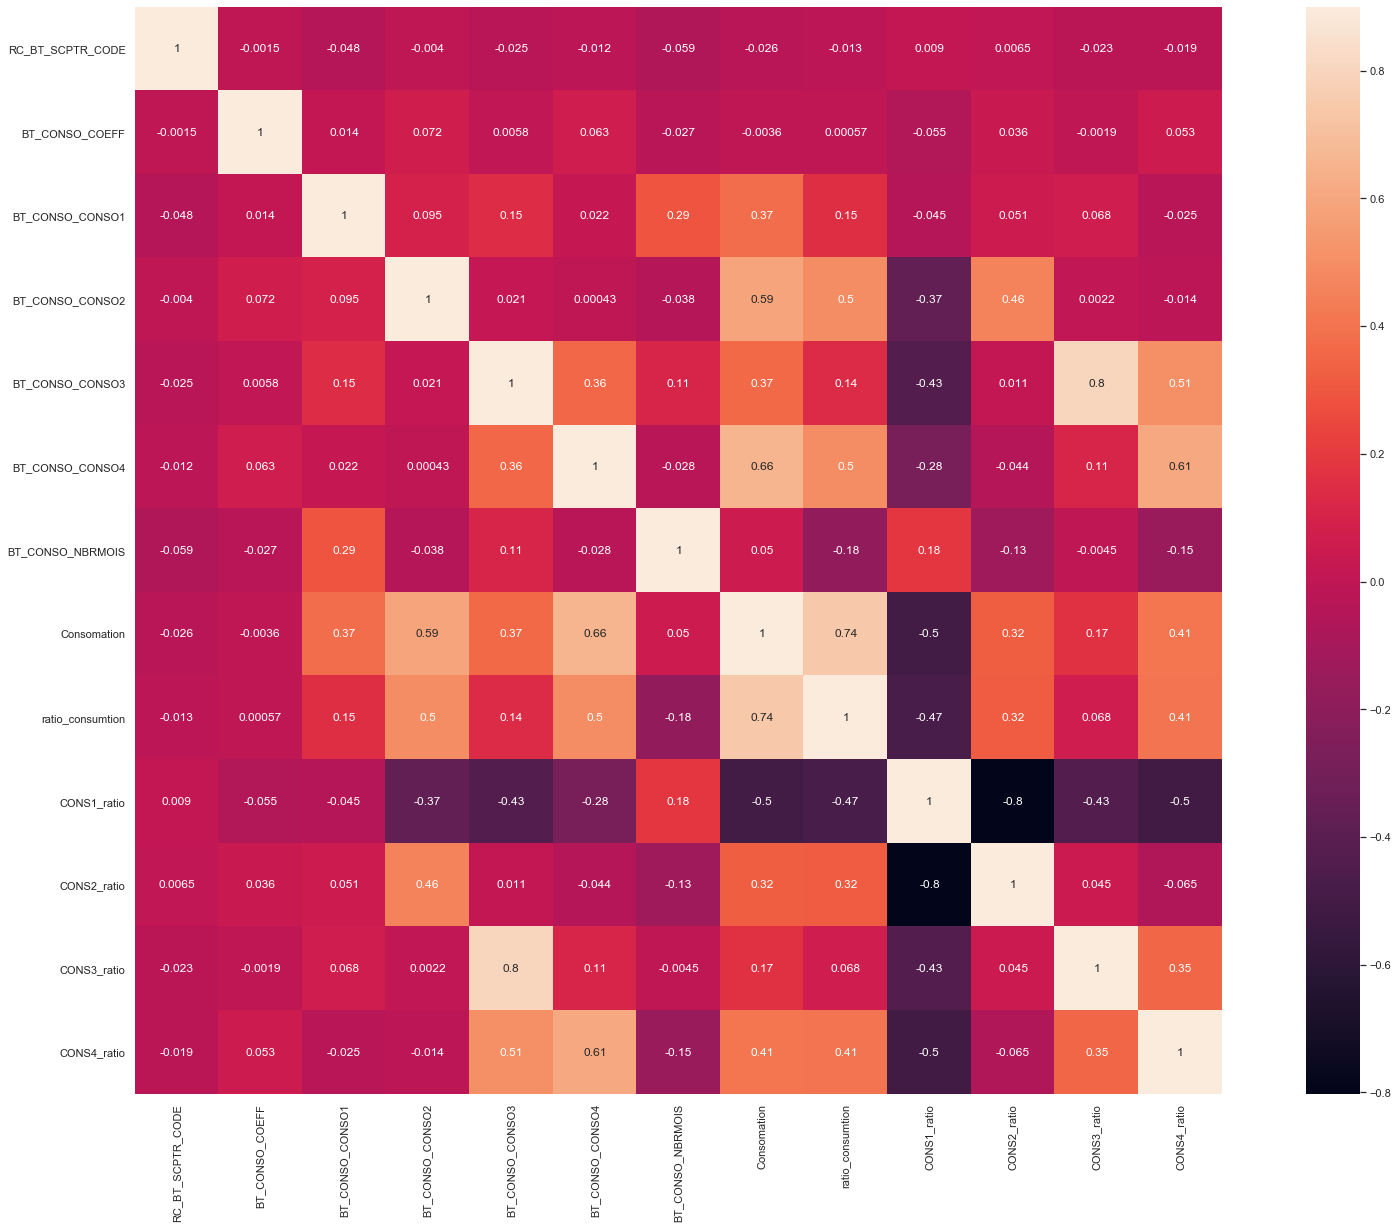

In [ ]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corrmat,vmax=0.9, square=True,annot=True)
plt.show();

As we see, most of the features that we have created are not  corrolated with each other. So most likely  that this data will not overfit the model. Although, We will take that into considaration when we will test our model. We may decide to drop some of them for the sake of our project.

In [ ]:
data.drop("ratio_consumtion",1,inplace=True)

We will create a new feature from the date column.

In [ ]:
data['quarter'] = data['CF_FACT_DATFACT'].dt.quarter

We already took what we want to from the date feature, It is useless for us now, we are going to drop it.

In [ ]:
data.drop("CF_FACT_DATFACT",1,inplace=True)

## New merge (After cleaning)

In [ ]:
new_train = pd.merge(data,data2, on="CF_AB_REF",how="inner")

In [ ]:
new_train.head()

,BT_CONSO_NUMCPTR,RC_BT_SCPTR_CODE,BT_CONSO_COEFF,BT_CONSO_CONSO1,BT_CONSO_CONSO2,BT_CONSO_CONSO3,BT_CONSO_CONSO4,BT_CONSO_NBRMOIS,Consomation,CONS1_ratio,CONS2_ratio,CONS3_ratio,CONS4_ratio,quarter,RC_UR_CODE,RC_CATEG_CODE,RC_COMMUNE_CODE,CF_AB_DAT_CREATION,FRAUDE
CF_AB_REF,,,,,,,,,,,,,,,,,,,
110050,124416,0,1,200,100,200,3409,1,3909,0.051164,0.025582,0.051164,0.872090,1,60,51,101,08/10/2004,0
110050,124416,0,1,200,100,200,4327,1,4827,0.041434,0.020717,0.041434,0.896416,2,60,51,101,08/10/2004,0
110050,124416,0,1,200,100,200,3756,1,4256,0.046992,0.023496,0.046992,0.882519,1,60,51,101,08/10/2004,0
110050,124416,0,1,200,100,200,4130,1,4630,0.043197,0.021598,0.043197,0.892009,1,60,51,101,08/10/2004,0
110050,124416,0,1,200,100,200,3732,1,4232,0.047259,0.023629,0.047259,0.881853,1,60,51,101,08/10/2004,0


The goal of the merge here is to create our target value "Fraude" for our consumption DataFrame. For that reason , we are going to drop all the other features for the client's dataframe because we find it useless.

In [ ]:
new_train.drop("RC_UR_CODE",1,inplace=True)
new_train.drop("RC_CATEG_CODE",1,inplace=True)
new_train.drop("RC_COMMUNE_CODE",1,inplace=True)
new_train.drop("CF_AB_DAT_CREATION",1,inplace=True)
target_orig=new_train['FRAUDE']

In [ ]:
new_train['FRAUDE'].value_counts()

0    429134
1      5836
Name: FRAUDE, dtype: int64

In [ ]:
new_train.head()

,BT_CONSO_NUMCPTR,RC_BT_SCPTR_CODE,BT_CONSO_COEFF,BT_CONSO_CONSO1,BT_CONSO_CONSO2,BT_CONSO_CONSO3,BT_CONSO_CONSO4,BT_CONSO_NBRMOIS,Consomation,CONS1_ratio,CONS2_ratio,CONS3_ratio,CONS4_ratio,quarter,FRAUDE
CF_AB_REF,,,,,,,,,,,,,,,
110050,124416,0,1,200,100,200,3409,1,3909,0.051164,0.025582,0.051164,0.872090,1,0
110050,124416,0,1,200,100,200,4327,1,4827,0.041434,0.020717,0.041434,0.896416,2,0
110050,124416,0,1,200,100,200,3756,1,4256,0.046992,0.023496,0.046992,0.882519,1,0
110050,124416,0,1,200,100,200,4130,1,4630,0.043197,0.021598,0.043197,0.892009,1,0
110050,124416,0,1,200,100,200,3732,1,4232,0.047259,0.023629,0.047259,0.881853,1,0


## First approach

In this first approach, we will consider dividing our observations into 4 groups. Each group corresponds to a trimester, because we highly believe that the consommation level differs every part of the year. The most naive example, Is that the consumption in the summer session is different than the consumption in the winter.
<br> We are going to need the quarter feature that we had already created to do so.

In [ ]:
new_train.quarter.unique()

array([1, 2, 3, 4], dtype=int64)

In [ ]:
new_train.reset_index(inplace=True)

In [ ]:
new_train=new_train.set_index(["CF_AB_REF","BT_CONSO_NUMCPTR"])

In [ ]:
new_train.head()

RC_BT_SCPTR_CODE  BT_CONSO_COEFF  BT_CONSO_CONSO1  \
CF_AB_REF BT_CONSO_NUMCPTR                                                      
110050    124416                           0               1              200   
          124416                           0               1              200   
          124416                           0               1              200   
          124416                           0               1              200   
          124416                           0               1              200   

                            BT_CONSO_CONSO2  BT_CONSO_CONSO3  BT_CONSO_CONSO4  \
CF_AB_REF BT_CONSO_NUMCPTR                                                      
110050    124416                        100              200             3409   
          124416                        100              200             4327   
          124416                        100              200             3756   
          124416                        100              200             4130   
          124416                        100              200             3732   

                            BT_CONSO_NBRMOIS  Consomation  CONS1_ratio  \
CF_AB_REF BT_CONSO_NUMCPTR                                               
110050    124416                           1         3909     0.051164   
          124416                           1         4827     0.041434   
          124416                           1         4256     0.046992   
          124416                           1         4630     0.043197   
          124416                           1         4232     0.047259   

                            CONS2_ratio  CONS3_ratio  CONS4_ratio  quarter  \
CF_AB_REF BT_CONSO_NUMCPTR                                                   
110050    124416               0.025582     0.051164     0.872090        1   
          124416               0.020717     0.041434     0.896416        2   
          124416               0.023496     0.046992     0.882519        1   
          124416               0.021598     0.043197     0.892009        1   
          124416               0.023629     0.047259     0.881853        1   

                            FRAUDE  
CF_AB_REF BT_CONSO_NUMCPTR          
110050    124416                 0  
          124416                 0  
          124416                 0  
          124416                 0  
          124416                 0

In [ ]:
X=new_train

In [ ]:
len(X)

434970

We have 434970 observation to work with , we have noticed that we don't have the same observations for each counter, for that reason, we have decided to apply to these observation some statistical operations in order to create a dataframe that contains the counter as the index and in order to train our model in a convenient way.


In [ ]:
X=X.reset_index()

In [ ]:
X.head()

,CF_AB_REF,BT_CONSO_NUMCPTR,RC_BT_SCPTR_CODE,BT_CONSO_COEFF,BT_CONSO_CONSO1,BT_CONSO_CONSO2,BT_CONSO_CONSO3,BT_CONSO_CONSO4,BT_CONSO_NBRMOIS,Consomation,CONS1_ratio,CONS2_ratio,CONS3_ratio,CONS4_ratio,quarter,FRAUDE
0,110050,124416,0,1,200,100,200,3409,1,3909,0.051164,0.025582,0.051164,0.872090,1,0
1,110050,124416,0,1,200,100,200,4327,1,4827,0.041434,0.020717,0.041434,0.896416,2,0
2,110050,124416,0,1,200,100,200,3756,1,4256,0.046992,0.023496,0.046992,0.882519,1,0
3,110050,124416,0,1,200,100,200,4130,1,4630,0.043197,0.021598,0.043197,0.892009,1,0
4,110050,124416,0,1,200,100,200,3732,1,4232,0.047259,0.023629,0.047259,0.881853,1,0


In [ ]:
X=X[X['CF_AB_REF']!='fectif']

In [ ]:
X['BT_CONSO_NUMCPTR'].value_counts()

1765936           147
50327             144
19642             143
19760             140
48937             140
                 ... 
61639               1
22307               1
A682565             1
1020760             1
27171100381090      1
Name: BT_CONSO_NUMCPTR, Length: 19634, dtype: int64

For the Fraud detection problem, we need to evaluate the counters that have an historic of consumption , that means new counters need to be dropped to proceed. 
<br> We chose to drop all the counters that have observations less then 5.

In [ ]:
X=X.groupby('BT_CONSO_NUMCPTR').filter(lambda x: len(x) >= 5)

It's guaranteed now that each counter has at least 5 observations.

In [ ]:
X['BT_CONSO_NUMCPTR'].value_counts()

1765936           147
50327             144
19642             143
48937             140
19760             140
                 ... 
27161135311500      5
02155700057849      5
92833               5
382887              5
27161100375540      5
Name: BT_CONSO_NUMCPTR, Length: 16648, dtype: int64

We will drop the "RC_BT_SCPTR_CODE" which gives us informtation about the situation of our counter. We find it useless here.

In [ ]:
X.drop("RC_BT_SCPTR_CODE",1,inplace=True)

In [ ]:
X.head()

,CF_AB_REF,BT_CONSO_NUMCPTR,BT_CONSO_COEFF,BT_CONSO_CONSO1,BT_CONSO_CONSO2,BT_CONSO_CONSO3,BT_CONSO_CONSO4,BT_CONSO_NBRMOIS,Consomation,CONS1_ratio,CONS2_ratio,CONS3_ratio,CONS4_ratio,quarter,FRAUDE
0,110050,124416,1,200,100,200,3409,1,3909,0.051164,0.025582,0.051164,0.872090,1,0
1,110050,124416,1,200,100,200,4327,1,4827,0.041434,0.020717,0.041434,0.896416,2,0
2,110050,124416,1,200,100,200,3756,1,4256,0.046992,0.023496,0.046992,0.882519,1,0
3,110050,124416,1,200,100,200,4130,1,4630,0.043197,0.021598,0.043197,0.892009,1,0
4,110050,124416,1,200,100,200,3732,1,4232,0.047259,0.023629,0.047259,0.881853,1,0


After several tries and comparison with the different models, we chose to work and apply the statistical operations only on those feature below which are <b> 'CF_AB_REF','BT_CONSO_NUMCPTR','BT_CONSO_CONSO1', 'BT_CONSO_CONSO2','BT_CONSO_CONSO3', 'BT_CONSO_CONSO4', 'Consomation','CONS1_ratio', 'CONS2_ratio', 'CONS3_ratio', 'CONS4_ratio','FRAUDE'

In [ ]:
cols=[ 'CF_AB_REF','BT_CONSO_NUMCPTR','BT_CONSO_CONSO1', 'BT_CONSO_CONSO2','BT_CONSO_CONSO3', 'BT_CONSO_CONSO4', 'Consomation','CONS1_ratio', 'CONS2_ratio', 'CONS3_ratio', 'CONS4_ratio','quarter','FRAUDE']

In [ ]:
X_=X[cols]

In [ ]:
X=X_

At this stage, we will divide our data into 4 groups , each group corresponds to a trimester of the year.

In [ ]:
X_1=X[X['quarter']==1]

In [ ]:
X_2=X[X['quarter']==2]

In [ ]:
X_3=X[X['quarter']==3]

In [ ]:
X_4=X[X['quarter']==4]

In [ ]:
len(X_1)

147216

In [ ]:
X_1.head()

,CF_AB_REF,BT_CONSO_NUMCPTR,BT_CONSO_CONSO1,BT_CONSO_CONSO2,BT_CONSO_CONSO3,BT_CONSO_CONSO4,Consomation,CONS1_ratio,CONS2_ratio,CONS3_ratio,CONS4_ratio,quarter,FRAUDE
0,110050,124416,200,100,200,3409,3909,0.051164,0.025582,0.051164,0.872090,1,0
2,110050,124416,200,100,200,3756,4256,0.046992,0.023496,0.046992,0.882519,1,0
3,110050,124416,200,100,200,4130,4630,0.043197,0.021598,0.043197,0.892009,1,0
4,110050,124416,200,100,200,3732,4232,0.047259,0.023629,0.047259,0.881853,1,0
5,110050,124416,200,100,200,4008,4508,0.044366,0.022183,0.044366,0.889086,1,0


### Statistical operations on the first group

In [ ]:
cols=['BT_CONSO_CONSO1', 'BT_CONSO_CONSO2','BT_CONSO_CONSO3', 'BT_CONSO_CONSO4', 'Consomation','CONS1_ratio', 'CONS2_ratio', 'CONS3_ratio', 'CONS4_ratio',]

In [ ]:
group_train_mean_1 = X_1.groupby('BT_CONSO_NUMCPTR')[cols].mean()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_mean"
group_train_mean_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X_1,group_train_mean_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")
#std
group_train_std_1 = X_1.groupby('BT_CONSO_NUMCPTR')[cols].std()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_std"
group_train_std_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X1,group_train_std_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")
#min

group_train_min_1 = X_1.groupby('BT_CONSO_NUMCPTR')[cols].min()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_min"
group_train_min_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X1,group_train_min_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")

#max

group_train_max_1 = X_1.groupby('BT_CONSO_NUMCPTR')[cols].max()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_max"
group_train_max_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X1,group_train_max_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")

#var

group_train_max_1 = X_1.groupby('BT_CONSO_NUMCPTR')[cols].var()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_var"
group_train_max_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X1,group_train_max_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")

#median

group_train_max_1 = X_1.groupby('BT_CONSO_NUMCPTR')[cols].median()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_median"
group_train_max_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X1,group_train_max_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")

We will drop the columns that we already used because we had already took what we want from it.

In [ ]:
X1.drop("BT_CONSO_CONSO1",1,inplace=True)
X1.drop("BT_CONSO_CONSO2",1,inplace=True)
X1.drop("BT_CONSO_CONSO3",1,inplace=True)
X1.drop("BT_CONSO_CONSO4",1,inplace=True)
X1.drop("Consomation",1,inplace=True)
X1.drop("CONS1_ratio",1,inplace=True)
X1.drop("CONS2_ratio",1,inplace=True)
X1.drop("CONS3_ratio",1,inplace=True)
X1.drop("CONS4_ratio",1,inplace=True)



In [ ]:
X1['FRAUDE'].value_counts()

0    145179
1      2037
Name: FRAUDE, dtype: int64

We have a lot of duplicated values , for that reason we have to drop them in order to feed the data into our model.

In [ ]:
X1.drop_duplicates(inplace=True)

In [ ]:
X1['FRAUDE'].value_counts()

0    19171
1      273
Name: FRAUDE, dtype: int64

In [ ]:
X1.dropna(inplace=True)

In [ ]:
X1['FRAUDE'].value_counts()

0    17362
1      251
Name: FRAUDE, dtype: int64

In [ ]:
X1.head()

,CF_AB_REF,BT_CONSO_NUMCPTR,quarter,FRAUDE,BT_CONSO_CONSO1_mean,BT_CONSO_CONSO2_mean,BT_CONSO_CONSO3_mean,BT_CONSO_CONSO4_mean,Consomation_mean,CONS1_ratio_mean,...,CONS4_ratio_var,BT_CONSO_CONSO1_median,BT_CONSO_CONSO2_median,BT_CONSO_CONSO3_median,BT_CONSO_CONSO4_median,Consomation_median,CONS1_ratio_median,CONS2_ratio_median,CONS3_ratio_median,CONS4_ratio_median
0,110050,124416,1,0,291.633333,3249.088889,91.111111,1512.566667,5144.400000,0.072101,...,0.180760,300.0,3214.0,0.0,0.0,4147.0,0.060846,0.916060,0.000000,0.00000
90,110070,171147,1,0,268.203390,1138.745763,138.983051,1798.610169,3344.542373,0.118534,...,0.164980,200.0,100.0,200.0,1772.0,2747.0,0.086976,0.043488,0.053858,0.77417
149,112400,300317,1,0,1382.857143,686.571429,211.785714,0.000000,2281.214286,0.607178,...,0.000000,1200.0,672.0,0.0,0.0,1894.5,0.625501,0.304807,0.000000,0.00000
150,112401,300317,1,0,1382.857143,686.571429,211.785714,0.000000,2281.214286,0.607178,...,0.000000,1200.0,672.0,0.0,0.0,1894.5,0.625501,0.304807,0.000000,0.00000
163,112450,300115,1,0,1354.000000,666.928571,310.785714,42.714286,2374.428571,0.584778,...,0.002233,1200.0,650.5,0.0,0.0,2172.5,0.562860,0.264215,0.000000,0.00000


In [ ]:
X1=X1.reset_index()

We will store the Fraude columns and the counter columns because we are going to need them to identify which counters are fraudulants

In [ ]:
target=X1["FRAUDE"]
comp=X1["BT_CONSO_NUMCPTR"]
clt=X1["CF_AB_REF"]
X1.drop("CF_AB_REF",1,inplace=True)
X1.drop("BT_CONSO_NUMCPTR",1,inplace=True)
X1.drop("FRAUDE",1,inplace=True)

In [ ]:
X1.drop("index",1,inplace=True)
X1.drop("quarter",1,inplace=True)

In [ ]:
X1.columns

Index(['BT_CONSO_CONSO1_mean', 'BT_CONSO_CONSO2_mean', 'BT_CONSO_CONSO3_mean',
       'BT_CONSO_CONSO4_mean', 'Consomation_mean', 'CONS1_ratio_mean',
       'CONS2_ratio_mean', 'CONS3_ratio_mean', 'CONS4_ratio_mean',
       'BT_CONSO_CONSO1_std', 'BT_CONSO_CONSO2_std', 'BT_CONSO_CONSO3_std',
       'BT_CONSO_CONSO4_std', 'Consomation_std', 'CONS1_ratio_std',
       'CONS2_ratio_std', 'CONS3_ratio_std', 'CONS4_ratio_std',
       'BT_CONSO_CONSO1_min', 'BT_CONSO_CONSO2_min', 'BT_CONSO_CONSO3_min',
       'BT_CONSO_CONSO4_min', 'Consomation_min', 'CONS1_ratio_min',
       'CONS2_ratio_min', 'CONS3_ratio_min', 'CONS4_ratio_min',
       'BT_CONSO_CONSO1_max', 'BT_CONSO_CONSO2_max', 'BT_CONSO_CONSO3_max',
       'BT_CONSO_CONSO4_max', 'Consomation_max', 'CONS1_ratio_max',
       'CONS2_ratio_max', 'CONS3_ratio_max', 'CONS4_ratio_max',
       'BT_CONSO_CONSO1_var', 'BT_CONSO_CONSO2_var', 'BT_CONSO_CONSO3_var',
       'BT_CONSO_CONSO4_var', 'Consomation_var', 'CONS1_ratio_var',
       'CONS2_r

## Training 

Now, we are going to feed our data into  the  models. After several tries of hyperparameters tuning, we concluded that the parameters below are the best fit.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, f1_score


# outlier detectors to be compared
classifiers = {'Isolation Forest':IsolationForest(n_estimators=2, max_samples='auto', 
                                                  contamination='auto', max_features=1.0,
                                                  bootstrap=False, n_jobs=-1, behaviour='deprecated',
                                                  random_state=None, verbose=0, warm_start=False),     
             'Local Outlier Factor': LocalOutlierFactor(n_neighbors=2, algorithm='auto', leaf_size=30,
                                                        metric='minkowski', p=2, metric_params=None,
                                                        contamination='auto', novelty=False, n_jobs=None),
             'DBSCAN':DBSCAN(eps = .2, metric="euclidean", min_samples = 2, n_jobs = -1)}
             
for (clf_name, clf) in classifiers.items():
    
    # fit and predict labels 
    y_pred = clf.fit_predict(X1)   
      
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred != -1] = 0
    y_pred[y_pred == -1] = 1 
        
    # classification metrics
    print(clf_name)
    print('Confusion Matrix\n', confusion_matrix(target, y_pred))  
    print('F1-score', f1_score(target, y_pred))
    print()

Isolation Forest
Confusion Matrix
 [[16632   730]
 [  241    10]]
F1-score 0.020181634712411706

Local Outlier Factor
Confusion Matrix
 [[14719  2643]
 [  210    41]]
F1-score 0.027938671209540033

DBSCAN
Confusion Matrix
 [[ 5303 12059]
 [   39   212]]
F1-score 0.033860405685992655



As we see we have very bad results for this first quarter , and it's likely to happen for the other groups, for that reason , we will work on all the data.
<br>
**However**,when we worked only on our data, we had only 290 fraud compared to 28000 non fraudulant counters, for that reason, we decided to extract the frauds from our colleagues data to have a better representation for the fraudulant cluster.

# Second approach

We will repeat here the same thing that we did on the group of the first trimester but now , it will be applied instead to all our data.

In [ ]:
cols=['BT_CONSO_CONSO1', 'BT_CONSO_CONSO2','BT_CONSO_CONSO3', 'BT_CONSO_CONSO4', 'Consomation','CONS1_ratio', 'CONS2_ratio', 'CONS3_ratio', 'CONS4_ratio',]

In [ ]:
X

,CF_AB_REF,BT_CONSO_NUMCPTR,BT_CONSO_CONSO1,BT_CONSO_CONSO2,BT_CONSO_CONSO3,BT_CONSO_CONSO4,Consomation,CONS1_ratio,CONS2_ratio,CONS3_ratio,CONS4_ratio,quarter,FRAUDE
0,110050,124416,200,100,200,3409,3909,0.051164,0.025582,0.051164,0.872090,1,0
1,110050,124416,200,100,200,4327,4827,0.041434,0.020717,0.041434,0.896416,2,0
2,110050,124416,200,100,200,3756,4256,0.046992,0.023496,0.046992,0.882519,1,0
3,110050,124416,200,100,200,4130,4630,0.043197,0.021598,0.043197,0.892009,1,0
4,110050,124416,200,100,200,3732,4232,0.047259,0.023629,0.047259,0.881853,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434965,3755650,242238,297,0,0,0,297,1.000000,0.000000,0.000000,0.000000,1,0
434966,3755650,242238,346,0,0,0,346,1.000000,0.000000,0.000000,0.000000,1,0
434967,3755650,242238,321,0,0,0,321,1.000000,0.000000,0.000000,0.000000,2,0
434968,3755650,242238,368,0,0,0,368,1.000000,0.000000,0.000000,0.000000,3,0


In [ ]:
group_train_mean_1 = X.groupby('BT_CONSO_NUMCPTR')[cols].mean()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_mean"
group_train_mean_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X,group_train_mean_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")
#std
group_train_std_1 = X.groupby('BT_CONSO_NUMCPTR')[cols].std()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_std"
group_train_std_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X1,group_train_std_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")
#min

group_train_min_1 = X.groupby('BT_CONSO_NUMCPTR')[cols].min()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_min"
group_train_min_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X1,group_train_min_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")

#max

group_train_max_1 = X.groupby('BT_CONSO_NUMCPTR')[cols].max()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_max"
group_train_max_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X1,group_train_max_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")

#median

group_train_max_1 = X_1.groupby('BT_CONSO_NUMCPTR')[cols].median()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_median"
group_train_max_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X1,group_train_max_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")

#var

group_train_max_1 = X_1.groupby('BT_CONSO_NUMCPTR')[cols].var()
rename_dict={}
for col in cols: 
    rename_dict[col]=col+"_var"
group_train_max_1.rename(rename_dict, axis= 1,inplace=True)

X1  =  pd.merge(X1,group_train_max_1, left_on="BT_CONSO_NUMCPTR",right_on="BT_CONSO_NUMCPTR",how="inner")


In [ ]:
X1.columns

Index(['CF_AB_REF', 'BT_CONSO_NUMCPTR', 'BT_CONSO_CONSO1', 'BT_CONSO_CONSO2',
       'BT_CONSO_CONSO3', 'BT_CONSO_CONSO4', 'Consomation', 'CONS1_ratio',
       'CONS2_ratio', 'CONS3_ratio', 'CONS4_ratio', 'quarter', 'FRAUDE',
       'BT_CONSO_CONSO1_mean', 'BT_CONSO_CONSO2_mean', 'BT_CONSO_CONSO3_mean',
       'BT_CONSO_CONSO4_mean', 'Consomation_mean', 'CONS1_ratio_mean',
       'CONS2_ratio_mean', 'CONS3_ratio_mean', 'CONS4_ratio_mean',
       'BT_CONSO_CONSO1_std', 'BT_CONSO_CONSO2_std', 'BT_CONSO_CONSO3_std',
       'BT_CONSO_CONSO4_std', 'Consomation_std', 'CONS1_ratio_std',
       'CONS2_ratio_std', 'CONS3_ratio_std', 'CONS4_ratio_std',
       'BT_CONSO_CONSO1_min', 'BT_CONSO_CONSO2_min', 'BT_CONSO_CONSO3_min',
       'BT_CONSO_CONSO4_min', 'Consomation_min', 'CONS1_ratio_min',
       'CONS2_ratio_min', 'CONS3_ratio_min', 'CONS4_ratio_min',
       'BT_CONSO_CONSO1_max', 'BT_CONSO_CONSO2_max', 'BT_CONSO_CONSO3_max',
       'BT_CONSO_CONSO4_max', 'Consomation_max', 'CONS1_ratio_max

In [ ]:
X1.drop("BT_CONSO_CONSO1",1,inplace=True)
X1.drop("BT_CONSO_CONSO2",1,inplace=True)
X1.drop("BT_CONSO_CONSO3",1,inplace=True)
X1.drop("BT_CONSO_CONSO4",1,inplace=True)
X1.drop("Consomation",1,inplace=True)
X1.drop("CONS1_ratio",1,inplace=True)
X1.drop("CONS2_ratio",1,inplace=True)
X1.drop("CONS3_ratio",1,inplace=True)
X1.drop("CONS4_ratio",1,inplace=True)



In [ ]:
X1.drop("quarter",1,inplace=True)

In [ ]:
X1.head()

,CF_AB_REF,BT_CONSO_NUMCPTR,FRAUDE,BT_CONSO_CONSO1_mean,BT_CONSO_CONSO2_mean,BT_CONSO_CONSO3_mean,BT_CONSO_CONSO4_mean,Consomation_mean,CONS1_ratio_mean,CONS2_ratio_mean,...,CONS4_ratio_median,BT_CONSO_CONSO1_var,BT_CONSO_CONSO2_var,BT_CONSO_CONSO3_var,BT_CONSO_CONSO4_var,Consomation_var,CONS1_ratio_var,CONS2_ratio_var,CONS3_ratio_var,CONS4_ratio_var
0,110050,124416,0,306.862319,3572.804348,91.304348,1482.449275,5453.42029,0.068039,0.571008,...,0.0,25704.594382,1.636554e+07,16324.594257,4.875409e+06,1.269367e+07,0.010204,0.200755,0.000735,0.18076
1,110050,124416,0,306.862319,3572.804348,91.304348,1482.449275,5453.42029,0.068039,0.571008,...,0.0,25704.594382,1.636554e+07,16324.594257,4.875409e+06,1.269367e+07,0.010204,0.200755,0.000735,0.18076
2,110050,124416,0,306.862319,3572.804348,91.304348,1482.449275,5453.42029,0.068039,0.571008,...,0.0,25704.594382,1.636554e+07,16324.594257,4.875409e+06,1.269367e+07,0.010204,0.200755,0.000735,0.18076
3,110050,124416,0,306.862319,3572.804348,91.304348,1482.449275,5453.42029,0.068039,0.571008,...,0.0,25704.594382,1.636554e+07,16324.594257,4.875409e+06,1.269367e+07,0.010204,0.200755,0.000735,0.18076
4,110050,124416,0,306.862319,3572.804348,91.304348,1482.449275,5453.42029,0.068039,0.571008,...,0.0,25704.594382,1.636554e+07,16324.594257,4.875409e+06,1.269367e+07,0.010204,0.200755,0.000735,0.18076


In [ ]:
X1['FRAUDE'].value_counts()

0    420912
1      5664
Name: FRAUDE, dtype: int64

We have a lot of duplicates because of the merge that we did, for that reason we are going to drop them

In [ ]:
X1.drop_duplicates(inplace=True)

In [ ]:
X1.dropna(inplace=True)

In [ ]:
X1['FRAUDE'].value_counts()

0    18092
1      254
Name: FRAUDE, dtype: int64

As we see, we have only 254 frauds comapred to 18092 non frauds , for that reason we will bring some frauds from our colleagues data.

### Bringing Data

For the second and third csv files, we applied the same data preparation that we did before, in order to maintain the same shape.

In [ ]:
second=pd.read_csv('62.csv')
third=pd.read_csv('63.csv')

In [ ]:
forth=pd.read_csv('69.csv')

In [ ]:
forth.head()

,Unnamed: 0,CF_AB_REF,BT_CONSO_NUMCPTR,FRAUDE,BT_CONSO_CONSO1_mean,BT_CONSO_CONSO2_mean,BT_CONSO_CONSO3_mean,BT_CONSO_CONSO4_mean,Consomation_mean,CONS1_ratio_mean,...,CONS4_ratio_median,BT_CONSO_CONSO1_var,BT_CONSO_CONSO2_var,BT_CONSO_CONSO3_var,BT_CONSO_CONSO4_var,Consomation_var,CONS1_ratio_var,CONS2_ratio_var,CONS3_ratio_var,CONS4_ratio_var
0,137,215020780,351822,1,431.238095,76.190476,64.142857,10.380952,581.952381,0.899855,...,0.0,105515.290476,25904.761905,32726.528571,2263.047619,3.498406e+05,0.041693,0.012556,0.008475,0.000508
1,158,215020780,17412,1,609.416667,0.000000,0.000000,0.000000,609.416667,1.000000,...,0.0,38784.265152,0.000000,0.000000,0.000000,3.878427e+04,0.000000,0.000000,0.000000,0.000000
2,270,215021520,59323,1,571.156250,95.781250,7.718750,0.000000,674.656250,0.922400,...,0.0,77399.555444,34262.950605,618.853831,0.000000,2.149828e+05,0.017599,0.014916,0.000249,0.000000
3,366,215021570,59367,1,314.909091,2.878788,0.000000,0.000000,317.787879,0.998302,...,0.0,73683.085227,273.484848,0.000000,0.000000,8.158680e+04,0.000095,0.000095,0.000000,0.000000
4,723,215021750,LZ15X405572377,1,669.500000,83.333333,166.666667,228.583333,1459.250000,0.798168,...,0.0,111044.818182,25151.515152,100606.060606,230476.083333,1.650824e+06,0.120998,0.004062,0.016249,0.036157


In [ ]:
third.head()


,Unnamed: 0,CF_AB_REF,BT_CONSO_NUMCPTR,FRAUDE,BT_CONSO_CONSO1_mean,BT_CONSO_CONSO2_mean,BT_CONSO_CONSO3_mean,BT_CONSO_CONSO4_mean,Consomation_mean,CONS1_ratio_mean,...,CONS4_ratio_median,BT_CONSO_CONSO1_var,BT_CONSO_CONSO2_var,BT_CONSO_CONSO3_var,BT_CONSO_CONSO4_var,Consomation_var,CONS1_ratio_var,CONS2_ratio_var,CONS3_ratio_var,CONS4_ratio_var
0,42,230073150,610001,1,385.638889,0.000000,0.000,0.0,385.638889,1.000000,...,0.0,26951.323016,0.000000,0.00,0.0,26951.323016,0.000000,0.000000,0.000000,0.0
1,78,230073150,2175703053400,1,472.333333,48.333333,0.000,0.0,520.666667,0.955657,...,0.0,66751.466667,14016.666667,0.00,0.0,118777.466667,0.011798,0.011798,0.000000,0.0
2,737,230062600,225357,1,641.000000,58.562500,7.375,0.0,706.937500,0.964009,...,0.0,293405.066667,26233.062500,870.25,0.0,462806.329167,0.011145,0.007384,0.000501,0.0
3,753,230062600,46953,1,1478.800000,56.400000,0.000,0.0,1535.200000,0.970032,...,0.0,870610.700000,15904.800000,0.00,0.0,903604.700000,0.004490,0.004490,0.000000,0.0
4,1610,230071200,610224,1,254.214286,0.000000,0.000,0.0,254.214286,1.000000,...,0.0,18755.878307,0.000000,0.00,0.0,18755.878307,0.000000,0.000000,0.000000,0.0


Data cleaning

In [ ]:
third.drop('Unnamed: 0',1,inplace=True)
second.drop('Unnamed: 0',1,inplace=True)
forth.drop('Unnamed: 0',1,inplace=True)

In [ ]:
Others=pd.concat([second,third,forth])
X2=pd.concat([X1,Others])

We will shuffle here in order to seperate the frauds that are now in the bottom of our DataFrame

In [ ]:
X2=X2.sample(frac=1)

In [ ]:
X2.reset_index(inplace=True)

In [ ]:
X2.drop('index',1,inplace=True)

In [ ]:
X2.head()

,CF_AB_REF,BT_CONSO_NUMCPTR,FRAUDE,BT_CONSO_CONSO1_mean,BT_CONSO_CONSO2_mean,BT_CONSO_CONSO3_mean,BT_CONSO_CONSO4_mean,Consomation_mean,CONS1_ratio_mean,CONS2_ratio_mean,...,CONS4_ratio_median,BT_CONSO_CONSO1_var,BT_CONSO_CONSO2_var,BT_CONSO_CONSO3_var,BT_CONSO_CONSO4_var,Consomation_var,CONS1_ratio_var,CONS2_ratio_var,CONS3_ratio_var,CONS4_ratio_var
0,456030,671915,0,1091.037037,85.037037,1.222222,0.000000,1147.555556,0.934677,0.064332,...,0.000000,69534.266667,9.647062e+04,108.900000,0.000000e+00,2.458752e+05,0.044480,0.043257,0.000072,0.000000
1,231106130,221740,1,627.564103,2.564103,5.128205,1.589744,636.846154,0.983484,0.004562,...,0.000000,178420.726046,2.564103e+02,1025.641026,9.856410e+01,1.736346e+05,0.010638,0.000812,0.003247,0.000312
2,3077450,616580,0,740.243243,2.324324,0.000000,0.000000,742.567568,0.997377,0.002623,...,0.000000,41688.247253,0.000000e+00,0.000000,0.000000e+00,4.168825e+04,0.000000,0.000000,0.000000,0.000000
3,215382740,570986,1,466.666667,1214.666667,266.666667,1902.333333,4419.333333,0.232598,0.456635,...,0.000000,85000.000000,5.177437e+06,160000.000000,1.011146e+07,1.318863e+07,0.026833,0.126271,0.004040,0.140171
4,215145681,048159,1,490.909091,245.454545,490.909091,13333.727273,14561.000000,0.052160,0.026080,...,0.879488,626909.090909,1.567273e+05,626909.090909,3.882561e+08,4.654863e+08,0.000933,0.000233,0.000933,0.005828


We will here save the target and prepare our final data to pipe it into our model. 

In [ ]:
target=X2["FRAUDE"]

In [ ]:
compteur=X2["BT_CONSO_NUMCPTR"]

In [ ]:
client=X2["CF_AB_REF"]

In [ ]:
X2.drop("CF_AB_REF",1,inplace=True)
X2.drop("BT_CONSO_NUMCPTR",1,inplace=True)
X2.drop("FRAUDE",1,inplace=True)

In [ ]:
target.value_counts()

0    18092
1     3589
Name: FRAUDE, dtype: int64

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.pyplot import axes, title
import numpy as np

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score

#### Without Standaridsation of the data

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import roc_auc_score
# outlier detectors to be compared
classifiers = {'Isolation Forest':IsolationForest(n_estimators=2, max_samples='auto', 
                                                  contamination='auto', max_features=1.0,
                                                  bootstrap=False, n_jobs=-1, behaviour='deprecated',
                                                  random_state=None, verbose=0, warm_start=False),     
             'Local Outlier Factor': LocalOutlierFactor(n_neighbors=2, algorithm='auto', leaf_size=30,
                                                        metric='minkowski', p=2, metric_params=None,
                                                        contamination='auto', novelty=False, n_jobs=None),
             'DBSCAN':DBSCAN(eps = 0.1, metric="euclidean", min_samples = 5, n_jobs = -1)}           
for (clf_name, clf) in classifiers.items():
    
    # fit and predict labels 
    y_pred = clf.fit_predict(X2)   
      
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred != -1] = 0
    y_pred[y_pred == -1] = 1 
        
    # classification metrics
    print(clf_name)
    print('Confusion Matrix\n', confusion_matrix(target, y_pred))  
    print('F1-score', f1_score(target, y_pred))
    print('AUC', roc_auc_score(target, y_pred))
    print('\n')

Isolation Forest
Confusion Matrix
 [[15638  2454]
 [ 3178   411]]
F1-score 0.12736287573597768
AUC 0.4894382582641448


Local Outlier Factor
Confusion Matrix
 [[15193  2899]
 [ 2956   633]]
F1-score 0.17778401909844121
AUC 0.5080678399440351


DBSCAN
Confusion Matrix
 [[   74 18018]
 [    0  3589]]
F1-score 0.2848864899190348
AUC 0.502045102807871




#### With Standardisation of the data

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix, f1_score

from sklearn.preprocessing import StandardScaler
X_Stand = StandardScaler().fit_transform(X2) 
X_Stand=pd.DataFrame(X_Stand)
classifiers = {'Isolation Forest':IsolationForest(n_estimators=2, max_samples='auto', 
                                                  contamination='auto', max_features=1.0,
                                                  bootstrap=False, n_jobs=-1, behaviour='deprecated',
                                                  random_state=None, verbose=0, warm_start=False),     
             'Local Outlier Factor': LocalOutlierFactor(n_neighbors=2, algorithm='auto', leaf_size=30,
                                                        metric='minkowski', p=2, metric_params=None,
                                                        contamination='auto', novelty=False, n_jobs=None),
             'DBSCAN':DBSCAN(eps = .2, metric="euclidean", min_samples = 2, n_jobs = -1)}
             
for (clf_name, clf) in classifiers.items():
    
    # fit and predict labels 
    y_pred = clf.fit_predict(X_Stand)   
      
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred != -1] = 0
    y_pred[y_pred == -1] = 1 
        
    # classification metrics
    print(clf_name)
    print('Confusion Matrix\n', confusion_matrix(target, y_pred))  
    print('F1-score', f1_score(target, y_pred))
    print('AUC', roc_auc_score(target, y_pred))
    print('\n')

Isolation Forest
Confusion Matrix
 [[14924  3168]
 [ 3077   512]]
F1-score 0.14087219700096298
AUC 0.48377655162336436


Local Outlier Factor
Confusion Matrix
 [[16411  1681]
 [ 3264   325]]
F1-score 0.1161751563896336
AUC 0.4988202384308996


DBSCAN
Confusion Matrix
 [[9874 8218]
 [1119 2470]]
F1-score 0.34601106675071797
AUC 0.616990035820139




### Interpretation of the models

As we see here, We don't have that much good of the results. That can be explained ,as we said in class, by the fact that the non fraudulant clients can be in fact fraudulants. <br> We can  clearly see that with Standardisation the Isolation Forest behaved better. However, this does not hold for the Local Outlier Factor , the F1 score decreased when we applied Standardisation. <br>
As for the DBSCAN algorthims, despite the fact that it gave us the best results (with/ without standardisation), we observed that it assigns a lot of 1 , the fact that lead to increased the number of False Positives (we tried a lot of hyperparameters but that did'nt help at all).

## Deep learning approach

In [ ]:
from pyod.models.auto_encoder import AutoEncoder
clf1 = AutoEncoder(hidden_neurons =[54,15, 10, 2, 10,15,54],epochs=30)
clf1.fit(X_Stand)

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 54)                2970      
_________________________________________________________________
dropout_1 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 54)                2970      
_________________________________________________________________
dropout_2 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 54)                2970      
_________________________________________________________________
dropout_3 (Dropout)          (None, 54)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 15)               

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=30,
      hidden_activation='relu', hidden_neurons=[54, 15, 10, 2, 10, 15, 54],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x0000020E38C5F168>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [ ]:
y_test_scores = clf1.decision_function(X_Stand)  
y_test_scores = pd.Series(y_test_scores)

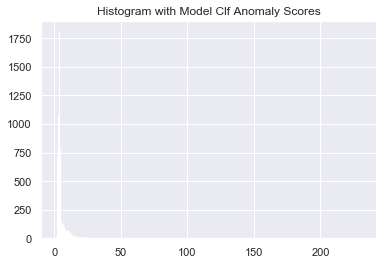

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y_test_scores,bins='auto',color="blue")  
plt.title("Histogram with Model Clf Anomaly Scores")
plt.show()

In [ ]:
df_test = X_Stand.copy()
df_test['score'] = y_test_scores
df_test['cluster'] = np.where(df_test['score']<7, 0, 1)
df_test['cluster'].value_counts()

0    18194
1     3487
Name: cluster, dtype: int64

In [ ]:
df_test.groupby('cluster').mean()


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,score
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.120601,-0.232555,-0.299686,-0.166566,-0.266757,0.362797,-0.282825,-0.273943,-0.273479,-0.082734,...,-0.023241,-0.077424,-0.191011,-0.027620,-0.033727,-0.185117,-0.223490,-0.180421,-0.256487,3.547756
1,0.629256,1.213393,1.563659,0.869086,1.391849,-1.892952,1.475687,1.429341,1.426920,0.431678,...,0.121264,0.403971,0.996631,0.144111,0.175976,0.965879,1.166095,0.941375,1.338261,13.256273


In [ ]:
print('Confusion Matrix\n', confusion_matrix(target, df_test['cluster']))  
print('F1-score', f1_score(target, df_test['cluster']))
print('AUC', roc_auc_score(target, df_test['cluster']))


Confusion Matrix
 [[15094  2998]
 [ 3100   489]]
F1-score 0.1382136800452233
AUC 0.4852705256135832


Well as we see here, the deep learning model is on average like the machine learning models that we have used for the anomalie detection problem.

# Conclusion

Unsupervised learning is a type of machine learning that looks for previously undetected patterns in a data set with no pre-existing labels and with a minimum of human supervision. In our case, we used the Unsupervised approach for the  detection of fraudulent activities.. In this type of problems, the model attempts to  analyze the available data and tries to identify the similarities and the differences between the transaction occurrences.

In our project, we have tried different models(IF,LOF,DBSCAN) and after comparing the results we are much likely going to use the LOF without standardisation (it has the highest F1 score and AUC).

According to the metrics that we calculated, using unsupervised learnig models didn't lead to that much good of results. That can be explained, by the fact that the non fraudulant clients can be in fact fraudulants and the fact that we have a very umbalanced data. 